1. Librerias

In [1]:
# ------------------------ Visualización ------------------------
import matplotlib.pyplot as plt                          # trazado básico con Matplotlib
import matplotlib.dates as mdates                        # formateo de fechas en ejes
from matplotlib.dates import DateFormatter               # formatos personalizados de fecha
import matplotlib.patches as mpatches                    # creación de parches / leyendas
from matplotlib.patches import Ellipse                   #create and draw elliptical shapes within a Matplotlib plot.
%matplotlib inline
import seaborn as sns                                    # visualizaciones estadísticas construidas sobre Matplotlib


# ------------------------ Manipulación de datos ------------------------
import pandas as pd                                      # estructuras tipo DataFrame
import numpy as np
from sklearn.preprocessing import StandardScaler         #Z-score normalization.
from sklearn.decomposition import PCA
#from ydata_profiling import ProfileReport                #analisis exploratorio
from scipy import stats
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette

from scipy.cluster.hierarchy import dendrogram           #function is used to visualize the results of hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import PolynomialFeatures   #transformación datos X al cuadrado

#----------------------- Factor Analyzer -------------------------------

'''
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
import networkx as nx
'''

#---------------------- linear regression (OLS), generalized linear models (GLM), and various statistical tests.
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.stats.diagnostic import het_white
from statsmodels.sandbox.stats.runs import runstest_1samp
from scipy.stats import kstest
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.stattools import durbin_watson
#Cargar las librerías


from collections import Counter
import math


#---------------------- UC Irvine Machine Learning Repository ---------------------------------------------
from ucimlrepo import fetch_ucirepo


2. Cargar el conjunto de datos

In [2]:
#codigo de https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified
idcode=555
   

try:
    from ucimlrepo import fetch_ucirepo
    # fetch dataset 
    apartment_for_rent_classified = fetch_ucirepo(id=idcode) 
       
    # data (as pandas dataframes) 
    datos = apartment_for_rent_classified.data.features
      

    print(apartment_for_rent_classified.variables) 


except ModuleNotFoundError:
    print("La librería 'ucimlrepo' no está instalada.")
    # Puedes añadir aquí un comando para instalarla, por ejemplo:
    import subprocess
    subprocess.check_call(["pip", "install", "ucimlrepo"])

except Exception as e:  # Catching other types of exceptions
    print(f"Error inesperado: {e}")
    

             name     role         type demographic description units  \
0              id       ID      Integer        None        None  None   
1        category  Feature  Categorical        None        None  None   
2           title  Feature  Categorical        None        None  None   
3            body  Feature  Categorical        None        None  None   
4       amenities  Feature  Categorical        None        None  None   
5       bathrooms  Feature      Integer        None        None  None   
6        bedrooms  Feature  Categorical        None        None  None   
7        currency  Feature  Categorical        None        None  None   
8             fee  Feature  Categorical        None        None  None   
9       has_photo  Feature  Categorical        None        None  None   
10   pets_allowed  Feature  Categorical        None        None  None   
11          price  Feature      Integer        None        None  None   
12  price_display  Feature      Integer        None

/Users/camilamillan/Mlopstrabajofinal/trabajofinal/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


EDA

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [6]:
datos.describe()

,price,latitude,longitude,time
count,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1527.208493,3.147604e+04,-91.562177,1.559690e+09
std,903.635759,7.022820e+06,15.819296,1.104487e+07
min,100.000000,1.957380e+01,-159.369800,1.544174e+09
25%,1014.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1350.000000,3.722970e+01,-84.562300,1.568745e+09
75%,1795.000000,3.995390e+01,-77.585300,1.568767e+09
max,52500.000000,1.568782e+09,-68.778800,1.577391e+09


In [7]:
datos.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


##Limpieza de datos

In [8]:

#datos.loc[:,'bathrooms'] = pd.to_numeric(datos['bathrooms'], errors='coerce')
#datos.loc[:,'bedrooms'] = pd.to_numeric(datos['bedrooms'], errors='coerce')
#datos.loc[:,'square_feet'] = pd.to_numeric(datos['square_feet'], errors='coerce')
datostransformados = datos.copy()

datostransformados['bathrooms'] = pd.to_numeric(datos['bathrooms'], errors='coerce')
datostransformados['bedrooms'] = pd.to_numeric(datos['bedrooms'], errors='coerce')
datostransformados['square_feet'] = pd.to_numeric(datos['square_feet'], errors='coerce')


#has_foto a binario, es irreelante si tiene foto o es thumbnail:
mapeo_foto = {'Yes': 1, 'Thumbnail': 1, 'No': 0}
datostransformados['has_photo_bin'] = datos['has_photo'].map(mapeo_foto)
del datostransformados['has_photo']

mapeo_fee = {'Yes': 1,'No': 0}
datostransformados['has_fee_bin'] = datos['fee'].map(mapeo_fee)
del datostransformados['fee']

#onehot encoding

datostransformados = pd.get_dummies(datostransformados, columns=['category'], prefix='cat', drop_first=True, dtype=int)
#datostransformados = pd.get_dummies(datostransformados, columns=['category'], prefix='cat', drop_first=True)


datostransformados['pets_allowed'].fillna('No',inplace=True)
datostransformados = pd.get_dummies(datostransformados, columns=['pets_allowed'], prefix='pets', drop_first=True, dtype=int)


datostransformados = pd.get_dummies(datostransformados, columns=['price_type'], prefix='pri', drop_first=True, dtype=int)

#error al leer los datos, borrar columnas que no deberian estar creadas, posiblemente por comas en las columnas title o body\

del datostransformados['cat_Gym']
del datostransformados['pets_Monthly']
del datostransformados['pri_Los Angeles']
del datostransformados['pri_VA']
                       


/var/folders/2l/x2p8t9756cqf9_kpc9kf3nfw0000gn/T/ipykernel_81429/768801130.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datostransformados['pets_allowed'].fillna('No',inplace=True)


In [10]:
datostransformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               99826 non-null  object 
 1   body                                99826 non-null  object 
 2   amenities                           83749 non-null  object 
 3   bathrooms                           99757 non-null  float64
 4   bedrooms                            99696 non-null  float64
 5   currency                            99822 non-null  object 
 6   price                               99821 non-null  float64
 7   price_display                       99820 non-null  object 
 8   square_feet                         99821 non-null  float64
 9   address                             7946 non-null   object 
 10  cityname                            99521 non-null  object 
 11  state                               99521

In [9]:
#dataset con datos borrados
datosclean=datostransformados[['bathrooms', 'bedrooms', 'price','square_feet','latitude','longitude','time','has_photo_bin',
                              'has_fee_bin','cat_Parking,Patio/Deck','cat_housing/rent','cat_housing/rent/apartment',
                              'cat_housing/rent/commercial/retail','cat_housing/rent/condo','cat_housing/rent/home',
                              'cat_housing/rent/other','cat_housing/rent/short_term','pets_Cats','pets_Cats,Dogs',
                              'pets_Cats,Dogs,None','pets_Dogs','pets_No','pri_Monthly','pri_Monthly|Weekly','pri_Weekly'
]].copy()
datosclean.dropna(inplace=True)
datosclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99608 entries, 0 to 99825
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bathrooms                           99608 non-null  float64
 1   bedrooms                            99608 non-null  float64
 2   price                               99608 non-null  float64
 3   square_feet                         99608 non-null  float64
 4   latitude                            99608 non-null  float64
 5   longitude                           99608 non-null  float64
 6   time                                99608 non-null  float64
 7   has_photo_bin                       99608 non-null  float64
 8   has_fee_bin                         99608 non-null  float64
 9   cat_Parking,Patio/Deck              99608 non-null  int64  
 10  cat_housing/rent                    99608 non-null  int64  
 11  cat_housing/rent/apartment          99608 non-

In [11]:
datosclean.to_csv('dataset.csv', sep='|')

In [13]:
datosclean

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,has_photo_bin,has_fee_bin,"cat_Parking,Patio/Deck",...,cat_housing/rent/other,cat_housing/rent/short_term,pets_Cats,"pets_Cats,Dogs","pets_Cats,Dogs,None",pets_Dogs,pets_No,pri_Monthly,pri_Monthly|Weekly,pri_Weekly
0,1.0,1.0,2195.0,542.0,33.8520,-118.3759,1.577360e+09,1.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
1,1.5,3.0,1250.0,1500.0,37.0867,-76.4941,1.577360e+09,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
2,2.0,3.0,1395.0,1650.0,35.8230,-78.6438,1.577360e+09,1.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,2.0,1600.0,820.0,38.3622,-121.9712,1.577360e+09,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
4,1.0,1.0,975.0,624.0,35.1038,-106.6110,1.577360e+09,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605.0,29.6151,-95.1998,1.544186e+09,1.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
99822,2.0,2.0,813.0,921.0,30.2254,-81.7579,1.544186e+09,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
99823,1.0,1.0,1325.0,650.0,32.7379,-117.0914,1.544186e+09,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
99824,1.0,1.0,931.0,701.0,35.4158,-80.8451,1.544186e+09,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df = datosclean.copy()

print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
display(df.dtypes.to_frame("dtype").T)

Filas: 99608 | Columnas: 25


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,has_photo_bin,has_fee_bin,"cat_Parking,Patio/Deck",...,cat_housing/rent/other,cat_housing/rent/short_term,pets_Cats,"pets_Cats,Dogs","pets_Cats,Dogs,None",pets_Dogs,pets_No,pri_Monthly,pri_Monthly|Weekly,pri_Weekly
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [16]:
# Identificación de columnas por "familias" (todas son numéricas, pero algunas son indicadores):
num_cols = df.columns.tolist()
target = "price"

flag_has   = [c for c in df.columns if c.startswith("has_")]
flag_cat   = [c for c in df.columns if c.startswith("cat_")]
flag_pets  = [c for c in df.columns if c.startswith("pets_")]
flag_pri   = [c for c in df.columns if c.startswith("pri_")]
coords     = [c for c in ["latitude","longitude"] if c in df.columns]
metricas   = [c for c in ["bathrooms","bedrooms","square_feet","time"] if c in df.columns]
print("Indicadores:", {"has":flag_has, "cat":flag_cat, "pets":flag_pets, "pri":flag_pri})
print("Métricas:", metricas, "| Coords:", coords)


Indicadores: {'has': ['has_photo_bin', 'has_fee_bin'], 'cat': ['cat_Parking,Patio/Deck', 'cat_housing/rent', 'cat_housing/rent/apartment', 'cat_housing/rent/commercial/retail', 'cat_housing/rent/condo', 'cat_housing/rent/home', 'cat_housing/rent/other', 'cat_housing/rent/short_term'], 'pets': ['pets_Cats', 'pets_Cats,Dogs', 'pets_Cats,Dogs,None', 'pets_Dogs', 'pets_No'], 'pri': ['pri_Monthly', 'pri_Monthly|Weekly', 'pri_Weekly']}
Métricas: ['bathrooms', 'bedrooms', 'square_feet', 'time'] | Coords: ['latitude', 'longitude']


In [17]:
na = df.isna().sum().sort_values(ascending=False)
na_pct = (na / len(df) * 100).round(2)
tabla_na = pd.DataFrame({"faltantes": na, "%faltantes": na_pct})
display(tabla_na[tabla_na.faltantes > 0])

print("Duplicados (filas completas):", df.duplicated().sum())

,faltantes,%faltantes


Duplicados (filas completas): 139


In [18]:
#Descriptivos extendidos
desc_num = df.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T
desc_num["skew"] = df.skew(numeric_only=True)
desc_num["kurtosis"] = df.kurtosis(numeric_only=True)
display(desc_num)

#Target (price)
print("Resumen 'price' (USD):")
display(df["price"].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).to_frame("price"))
print(f"Skew: {df['price'].skew():.3f} | Kurtosis: {df['price'].kurtosis():.3f}")

#Outliers por IQR
outliers_info = {}
for c in df.columns:
    q1, q3 = df[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers_info[c] = int(((df[c] < low) | (df[c] > high)).sum())
outliers = pd.Series(outliers_info).sort_values(ascending=False)
display(pd.DataFrame({"outliers_IQR": outliers, "%": (outliers/len(df)*100).round(2)}).head(20))


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,skew,kurtosis
bathrooms,99608.0,1.445772e+00,5.469636e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00,0.984065,2.301799
bedrooms,99608.0,1.728285e+00,7.485670e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00,0.876308,1.592645
price,99608.0,1.527487e+03,8.991560e+02,1.000000e+02,5.480000e+02,6.990000e+02,1.015000e+03,1.350000e+03,1.795000e+03,2.925000e+03,4.250000e+03,5.250000e+04,9.807486,304.060257
square_feet,99608.0,9.560534e+02,3.651792e+02,1.070000e+02,4.000000e+02,5.340000e+02,7.300000e+02,9.000000e+02,1.116000e+03,1.493000e+03,2.254790e+03,1.200000e+04,3.713129,45.606909
latitude,99608.0,3.694992e+01,4.599496e+00,1.957380e+01,2.636350e+01,2.850330e+01,3.374650e+01,3.723100e+01,3.995390e+01,4.314960e+01,4.771790e+01,6.483320e+01,0.011870,0.211508
longitude,99608.0,-9.154913e+01,1.581275e+01,-1.593698e+02,-1.223139e+02,-1.197655e+02,-1.047919e+02,-8.455180e+01,-7.757670e+01,-7.145740e+01,-7.097580e+01,-6.877880e+01,-0.627598,-0.804718
time,99608.0,1.559681e+09,1.104310e+07,1.544174e+09,1.544187e+09,1.544228e+09,1.550832e+09,1.568745e+09,1.568767e+09,1.577358e+09,1.577360e+09,1.577391e+09,-0.066011,-1.589853
has_photo_bin,99608.0,9.071962e-01,2.901587e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.806770,5.878075
has_fee_bin,99608.0,1.977753e-03,4.442816e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,22.419667,500.651538
"cat_Parking,Patio/Deck",99608.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000


Resumen 'price' (USD):


,price
count,99608.000000
mean,1527.486627
std,899.155951
min,100.000000
1%,548.000000
5%,699.000000
25%,1015.000000
50%,1350.000000
75%,1795.000000
95%,2925.000000


Skew: 9.807 | Kurtosis: 304.060


,outliers_IQR,%
has_photo_bin,9244,9.28
price,4703,4.72
square_feet,2830,2.84
pets_Cats,1842,1.85
bedrooms,1840,1.85
bathrooms,202,0.20
has_fee_bin,197,0.20
pets_Dogs,127,0.13
latitude,88,0.09
longitude,85,0.09


In [19]:
##Correlaciones objetivo (price)
#Correlación con el
corr_full = df.corr(numeric_only=True)
corr_price = corr_full["price"].drop("price").sort_values(key=lambda s: s.abs(), ascending=False)
display(pd.DataFrame({"corr_con_price": corr_price}).head(20))

,corr_con_price
square_feet,0.412334
bathrooms,0.329841
bedrooms,0.236792
longitude,-0.107049
latitude,0.057489
time,0.057049
pets_No,0.054505
"pets_Cats,Dogs",-0.050994
has_photo_bin,-0.032734
has_fee_bin,0.021850


In [20]:
##Matriz de correlación


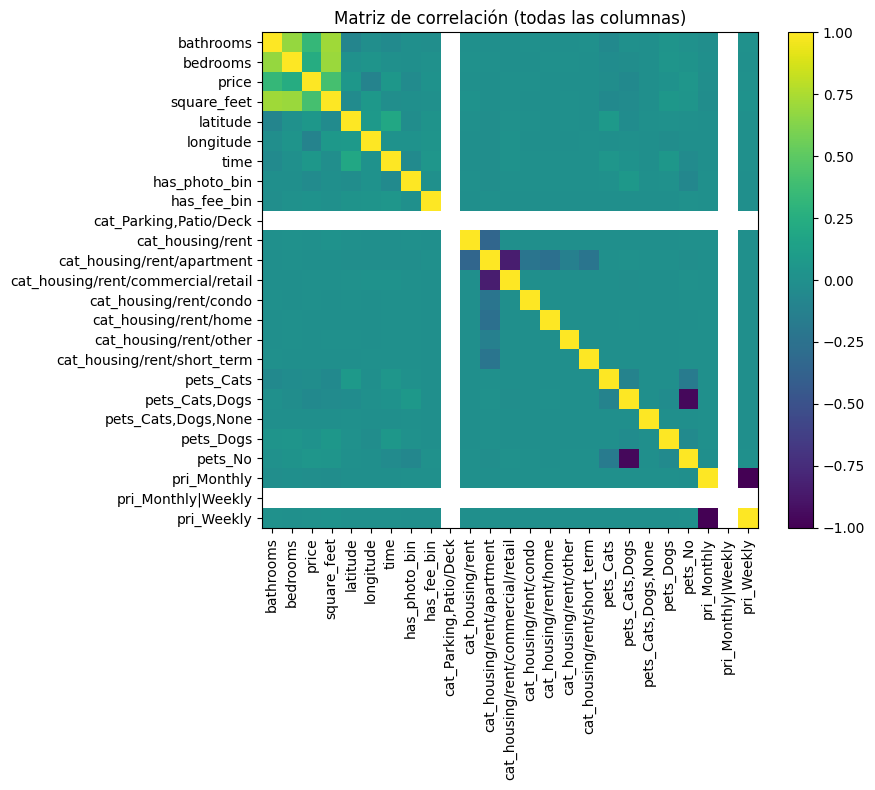

In [21]:
plt.figure(figsize=(10,8))
im = plt.imshow(corr_full, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_full.columns)), corr_full.columns, rotation=90)
plt.yticks(range(len(corr_full.index)), corr_full.index)
plt.title("Matriz de correlación (todas las columnas)")
plt.tight_layout(); plt.show()

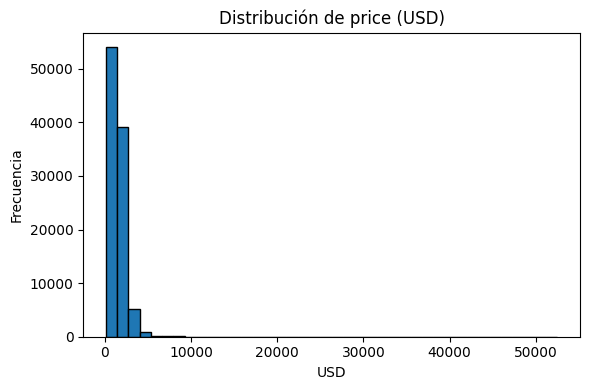

<Figure size 400x300 with 0 Axes>

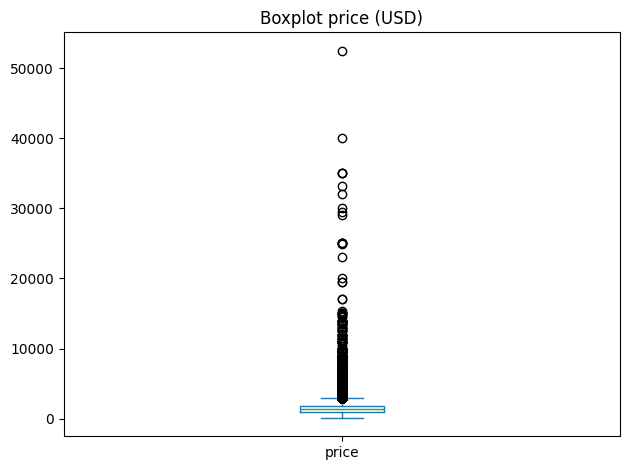

In [22]:
# Boxplot del objetivo price
plt.figure(figsize=(6,4))
df["price"].plot(kind="hist", bins=40, edgecolor="black")
plt.title("Distribución de price (USD)")
plt.xlabel("USD"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

plt.figure(figsize=(4,3))
df[["price"]].plot(kind="box")
plt.title("Boxplot price (USD)")
plt.tight_layout(); plt.show()

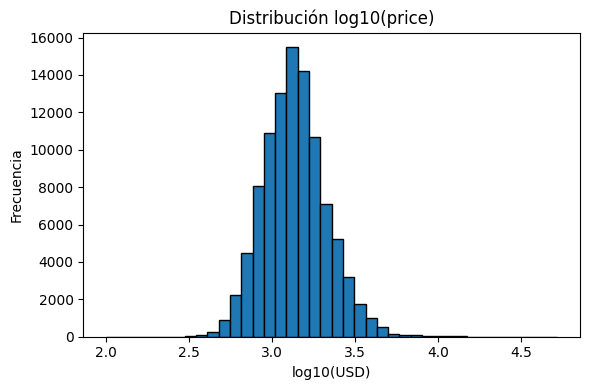

In [23]:
#Histograma log10 ya que se tiene cola a la derecha
pt_pos = df["price"][df["price"]>0]
if pt_pos.shape[0] > 0:
    plt.figure(figsize=(6,4))
    np.log10(pt_pos).plot(kind="hist", bins=40, edgecolor="black")
    plt.title("Distribución log10(price)")
    plt.xlabel("log10(USD)"); plt.ylabel("Frecuencia")
    plt.tight_layout(); plt.show()

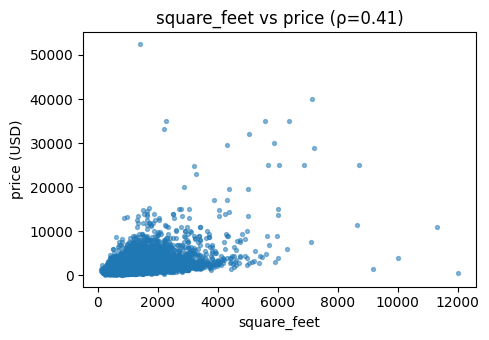

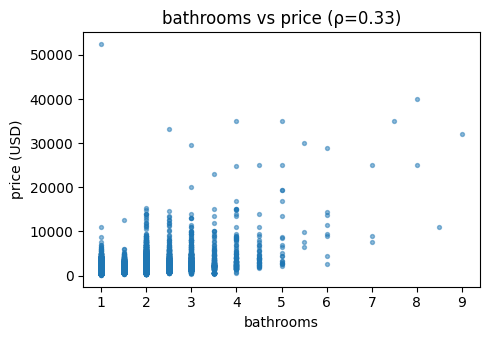

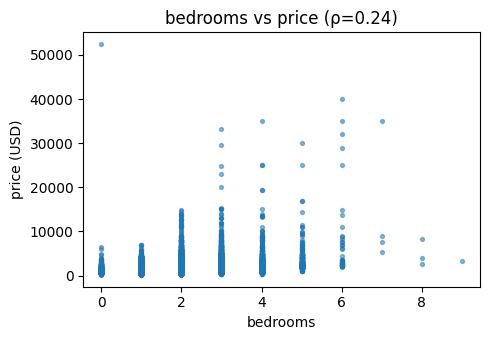

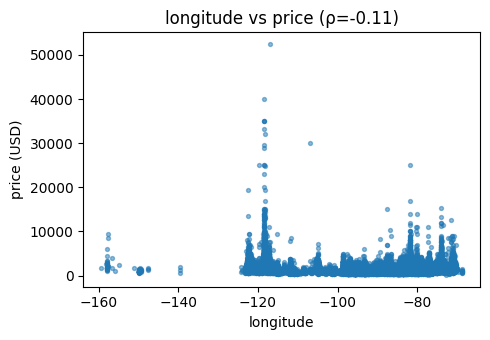

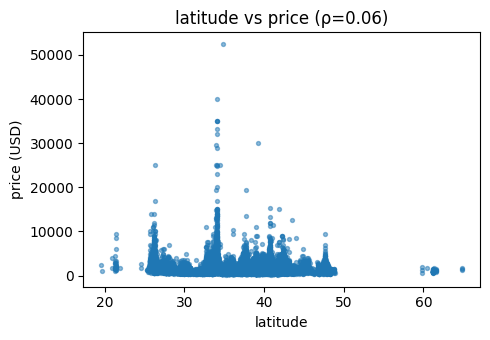

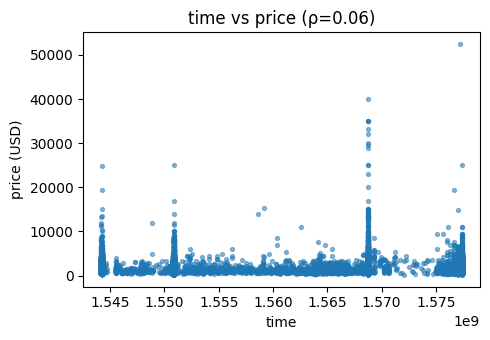

In [24]:
#Dispersión vs top-6 variables más correlacionadas
top_num = corr_price.head(6).index.tolist()
for c in top_num:
    plt.figure(figsize=(5,3.5))
    plt.scatter(df[c], df["price"], s=8, alpha=0.5)
    plt.xlabel(c); plt.ylabel("price (USD)")
    rho = corr_price[c]
    plt.title(f"{c} vs price (ρ={rho:.2f})")
    plt.tight_layout(); plt.show()



/var/folders/2l/x2p8t9756cqf9_kpc9kf3nfw0000gn/T/ipykernel_81429/1520266029.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  curv = serie.groupby("bin")["price"].mean()


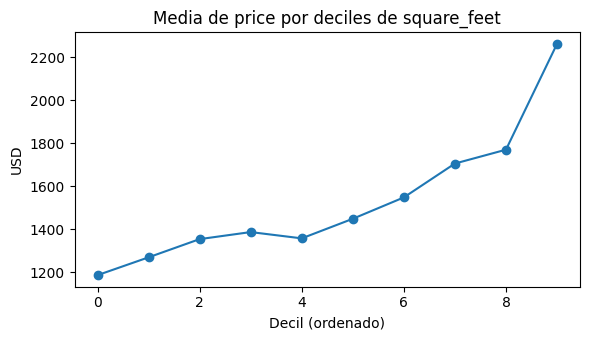

/var/folders/2l/x2p8t9756cqf9_kpc9kf3nfw0000gn/T/ipykernel_81429/1520266029.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  curv = serie.groupby("bin")["price"].mean()


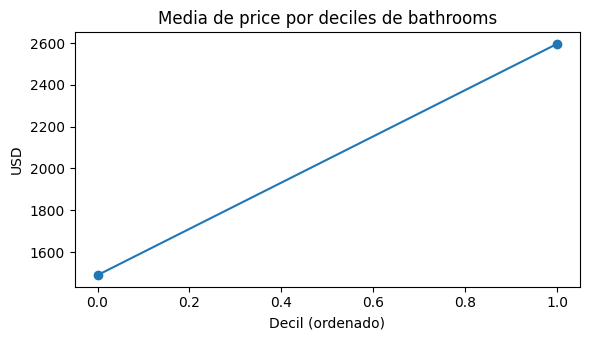

/var/folders/2l/x2p8t9756cqf9_kpc9kf3nfw0000gn/T/ipykernel_81429/1520266029.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  curv = serie.groupby("bin")["price"].mean()


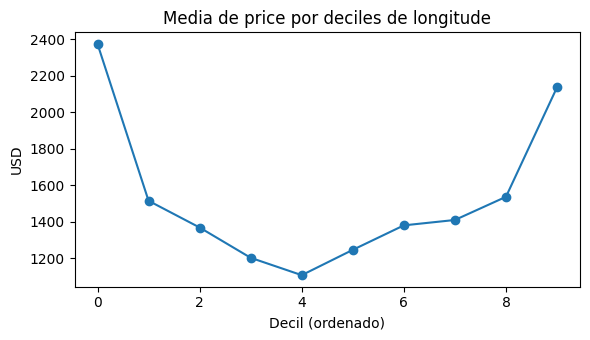

/var/folders/2l/x2p8t9756cqf9_kpc9kf3nfw0000gn/T/ipykernel_81429/1520266029.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  curv = serie.groupby("bin")["price"].mean()


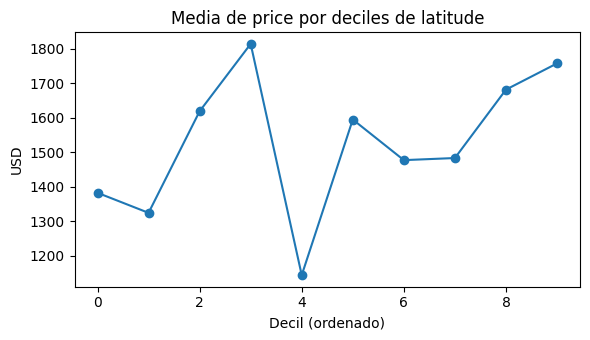

/var/folders/2l/x2p8t9756cqf9_kpc9kf3nfw0000gn/T/ipykernel_81429/1520266029.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  curv = serie.groupby("bin")["price"].mean()


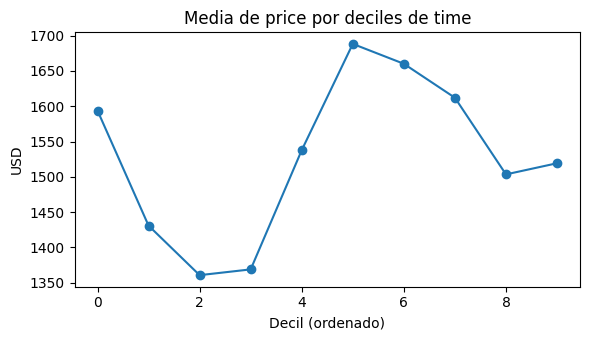

In [25]:
# Curva de medias por deciles
for c in top_num:
    serie = df[[c, "price"]].dropna()
    if serie[c].nunique() > 10:
        serie = serie.copy()
        serie["bin"] = pd.qcut(serie[c], q=10, duplicates="drop")
        curv = serie.groupby("bin")["price"].mean()
        plt.figure(figsize=(6,3.5))
        curv.reset_index(drop=True).plot(marker="o")
        plt.title(f"Media de price por deciles de {c}")
        plt.xlabel("Decil (ordenado)"); plt.ylabel("USD")
        plt.tight_layout(); plt.show()
